In [91]:
#Importing python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data**

In [92]:
data = pd.read_csv('Customer Churn.csv')
data.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


**Cleaning Data**

In [93]:
#Geting info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [94]:
#Replaceing blang values of Total charges with 0
data['TotalCharges'] = data['TotalCharges'].replace(" ","0")

#Converting data type of 'Total Charges' into int
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

#Replacing Null values of 'Total Charges' Values with zero
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [95]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [96]:
# Now we are going to check if there are any duplicate in data
data.duplicated().sum()

#We are going tocheck if there are any duplicate customer entry
data["customerID"].duplicated().sum()

np.int64(0)

***In our data we are seaing that 'Serior Citizen' col containg bool values but we want it to be Yes/No so we are going to change it***

In [97]:
def conv(value):
    if(value == 1):
        return "Yes"
    if(value == 0):
        return "No"
    
data['SeniorCitizen'] = data['SeniorCitizen'].apply(conv)

In [98]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Exploratory Data Analysis**

***How may peole have Churned out or not***

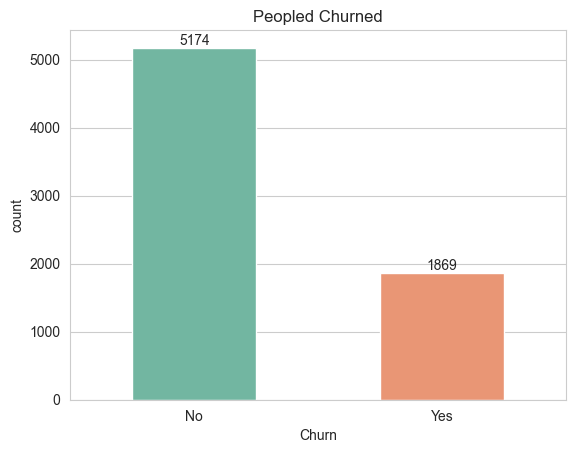

In [99]:
ax = sns.countplot(data = data, x = "Churn", width=0.5 ,  hue="Churn",
    palette='Set2')

sns.set_style("whitegrid")

plt.title('Peopled Churned')

for bars in ax.containers:
    ax.bar_label(bars)

***"Here we see that Total 1869 person have churned out"***

***Analazying the percentage of thre same***

Text(0.5, 1.0, 'Percentage of Churned Customer')

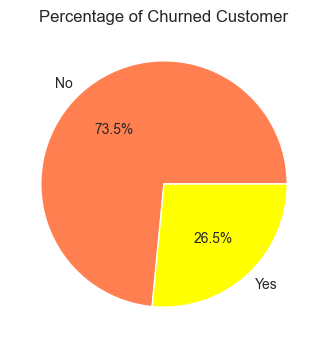

In [100]:
plt.figure(figsize=(4,4))
gb = data.groupby("Churn").agg({'Churn':'count'})

plt.pie(gb['Churn'], labels = ['No','Yes'], autopct='%1.1f%%', colors = ['coral','yellow'])
plt.title("Percentage of Churned Customer")

***"From give pie chart we can conclude that 25.5% of customer have churned out"***

***Lets explore the reason***

***Churn By Gender***

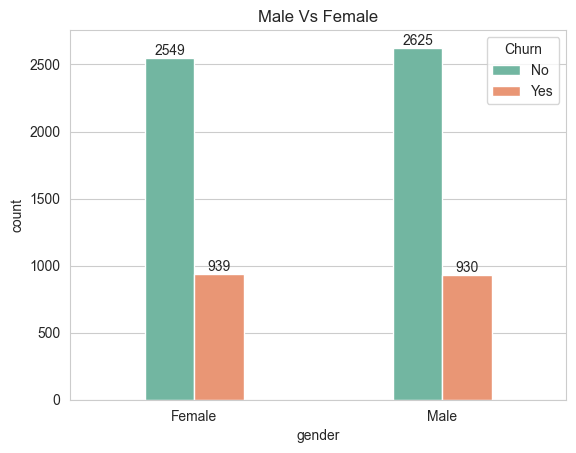

In [ ]:
plt.title("Churn By Gender")
ax = sns.countplot(data = data, x = "gender" , hue ='Churn',palette='Set2',width=0.4)
for bars in ax.containers:
    ax.bar_label(bars)

***"From above graph we can conclude it is not Gender Specific"***

***Chury By Age***

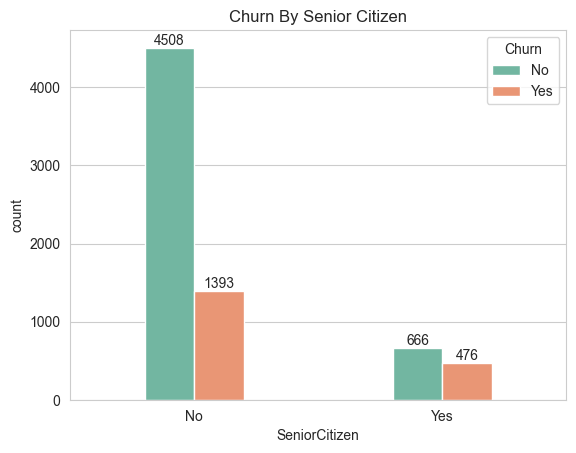

In [108]:
plt.title("Churn By Senior Citizen")
ax = sns.countplot(data = data, x = "SeniorCitizen" , hue ='Churn',palette='Set2',width=0.4)
for bars in ax.containers:
    ax.bar_label(bars)

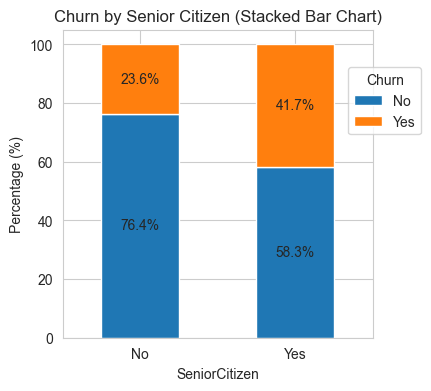

In [ ]:
total_counts = data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax,)  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location expalin this whole code to me

***comparatively a greater percentage of peope in seniour citizen category have chrened out***

**Churned on basis of tenure**

<Axes: xlabel='tenure', ylabel='Count'>

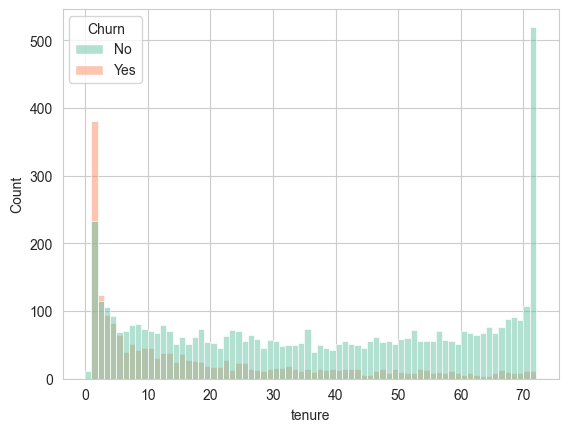

In [112]:
sns.histplot(data= data, x = "tenure", hue = "Churn", bins = 72, palette = 'Set2')

***"Most of the people have churned out in initial 1 or 2 months"***

**Number of people based on contract**

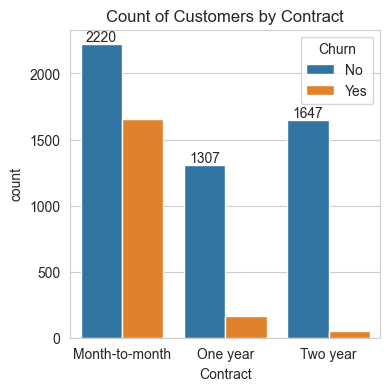

In [114]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

***"People who have month to month tenure are likey to churn"***

In [115]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

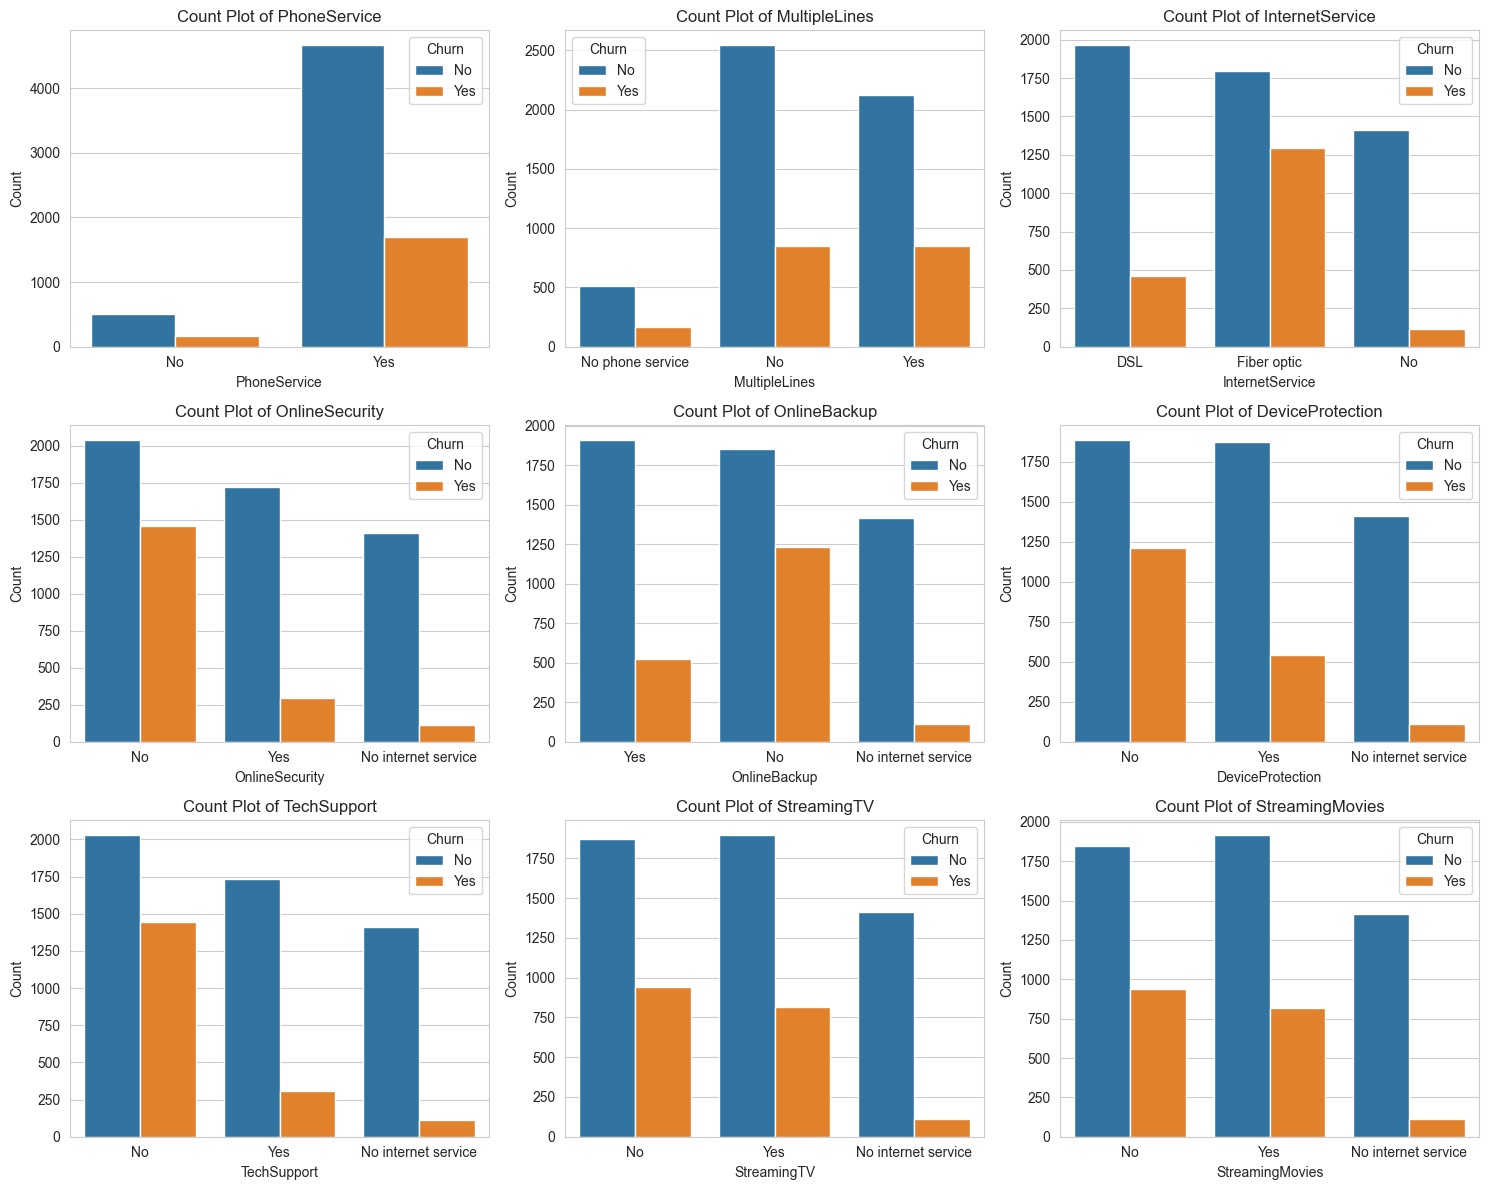

In [116]:

columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=data, ax=axes[i], hue = data["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

***The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable***

**Summary:**

***This report analyzes customer churn by examining various service-related features. The analysis shows that customers without value-added services such as online security, tech support, and device protection are more likely to churn. Overall, better service engagement and support are strongly associated with lower churn rates.***